In [72]:
import numpy as np
import cv2
from scipy import stats
import nibabel as nib
import matplotlib.pyplot as plt
from skimage.transform import rotate

# Dans cette partie, on réalise la normalisation et le redimensionnement sur les  images NIFTI ( Ces deux étapes sont inclus sur les scripts de prrétraitement sur GitLab )

In [2]:
def normalize (im_array):
    return stats.zscore(im_array,axis=None) #zscore sur scipy https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.zscore.html

In [3]:
def zero_padd(im_array, new_size) :
    
    #new_size est la taille souhaité 


    old_size = im_array.shape[:2] # old_size is in (height, width) format

    ratio = float(new_size)/max(old_size)  # ratio de l'image
    new_size = tuple([int(x*ratio) for x in old_size]) 

    # new_size en format (largeur, hauteur) format

    im_array = cv2.resize(im_array, (new_size[1], new_size[0])) #resize avec la fonction sur opencv

    #Cette partie c'est pour garder le ratio et conserver les bordures ou frontiéres
    delta_w = desired_size - new_size[1]
    delta_h = desired_size - new_size[0]
    top, bottom = delta_h//2, delta_h-(delta_h//2)
    left, right = delta_w//2, delta_w-(delta_w//2)

    color = [0, 0, 0]
    new_im = cv2.copyMakeBorder(im_array, top, bottom, left, right, cv2.BORDER_CONSTANT,
                                value=color)
    return new_im

### Exemples

In [92]:
#on importe un cas NIFTI
path=r"C:\Users\zelmouaffek\Desktop\Prétraitement\Benins_125_zscore.nii.gz"
I=nib.load(path).get_fdata()

In [93]:
I[0] # Pixels non normalisés

array([[-1.61716117, -1.61716117, -1.61716117, ..., -1.61716117,
        -1.61716117, -1.61716117],
       [-1.61716117, -1.61716117, -1.61716117, ..., -1.61716117,
        -1.61716117, -1.61716117],
       [-1.61716117, -1.61716117, -1.61716117, ..., -1.61716117,
        -1.61716117, -1.61716117],
       ...,
       [-1.61716117, -1.61716117, -1.61716117, ..., -1.61716117,
        -1.61716117, -1.61716117],
       [-1.61716117, -1.61716117, -1.61716117, ..., -1.61716117,
        -1.61716117, -1.61716117],
       [-1.61716117, -1.61716117, -1.61716117, ..., -1.61716117,
        -1.61716117, -1.61716117]])

In [94]:
#Normaliser l'image Nifti coupe par coupe
for i in range (I.shape[2]) :
   I[:,:,i]= normalize(I[:,:,i])

In [95]:
I[0]# Pixels  normalisés

array([[-0.75231661, -0.73171042, -0.77234475, ..., -0.84507863,
        -0.82559367, -0.81403799],
       [-0.75231661, -0.73171042, -0.77234475, ..., -0.84507863,
        -0.82559367, -0.81403799],
       [-0.75231661, -0.73171042, -0.77234475, ..., -0.84507863,
        -0.82559367, -0.81403799],
       ...,
       [-0.75231661, -0.73171042, -0.77234475, ..., -0.84507863,
        -0.82559367, -0.81403799],
       [-0.75231661, -0.73171042, -0.77234475, ..., -0.84507863,
        -0.82559367, -0.81403799],
       [-0.75231661, -0.73171042, -0.77234475, ..., -0.84507863,
        -0.82559367, -0.81403799]])

In [96]:
#Redimensionnement de l'image Nifti coupe par coupe
J=np.zeros((512,512,I.shape[2]))  #Taille souhaité 512 * 512
for i in range (I.shape[2]) :
   J[:,:,i]= zero_padd(I[:,:,i], 512)

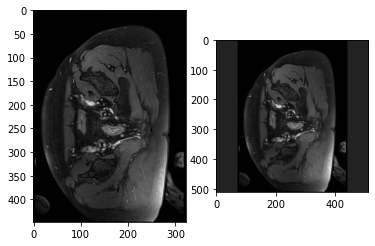

In [97]:
#Visualisation du redimensionnement
plt.subplot(1,2,1)
plt.imshow(I[:,:,10],cmap='gray')

plt.subplot(1,2,2)
plt.imshow(J[:,:,10],cmap='gray')

In [68]:
J.shape

(512, 512, 18)

In [70]:
I.shape

(384, 384, 18)